<a href="https://colab.research.google.com/github/sam1610/Inference_DIRinfo/blob/master/Copy_of_7_7_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment prepartion & libraries installation

- Links
https://dash.plotly.com/basic-callbacks
https://beta.packtpub.com/book/data/9781800568532/6/ch06lvl1sec27/controlling-seasonality-with-fourier-order

In [ ]:
! pip  install -U   scikit-learn  random_timestamp ipywidgets plotly

In [ ]:
import pandas as pd  
import numpy as np
import random
import string
from random import randint
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib.dates import DateFormatter
from datetime import timedelta
from datetime import datetime
from ipywidgets import interact, Dropdown , Layout , Box , Button
from ipywidgets import Checkbox

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls  /content/drive/MyDrive/portalAnalysis/

In [ ]:
cd /content/drive/MyDrive/portalAnalysis/

#Loading data sets

## Load General-Students-Info.csv   (( df_st ))

In [ ]:
df_st=pd.read_csv("./Data/General_students_info.csv", index_col=0,converters={'student_ID': lambda x: str(x) , # lambda used to keep zeros to the left of no.s
                                                                              'birth_year': lambda x: str(x) ,
                                                                              'birth_month': lambda x: str(x)})

In [ ]:
df_st.head()

## Load Student's Portal Achievments (( df_avt ))

In [ ]:
df_avt=pd.read_csv("./Data/Portal-Achiev-Info.csv", index_col=0,converters={'student_ID': lambda x: str(x)})

In [ ]:
df_avt.head()

## Load the dataset that has 5 selected students Info (( dt_st ))

In [ ]:
dt_st=pd.read_csv("./Data/5_selected_students.csv", index_col=0,converters={'student_ID': lambda x: str(x)})

In [ ]:
dt_st["Act_submit_Time"]= pd.to_datetime(dt_st.Act_submit_Time)

In [ ]:
dt_st.query("Activity_type=='0'").Act_time.describe().T

In [ ]:
dt_st[dt_st.Activity_type=='0']["Act_time"]=dt_st.query("Activity_type=='0'").Act_time/60

In [ ]:
dt_st.sample(10)

In [ ]:
dt_st.set_index("Act_submit_Time", inplace=True)

## Load the dataset that has statistics about students achievments (( df_mg ))

In [ ]:
df_mg=pd.read_csv("./Data/student_statistics.csv", index_col=0,converters={'student_ID': lambda x: str(x)})

In [ ]:
df_mg.head()

## Load the predicted data set (( predict_std ))

In [ ]:
predict_std=pd.read_csv("./Data/predicted_data.csv", index_col=0,converters={'student_ID': lambda x: str(x)})

In [ ]:
predict_std.head()

## Load Recommend data set (( df_recommend ))

In [ ]:
df_recommend=pd.read_csv("./Data/recommend.csv", index_col=0,converters={'student_ID': lambda x: str(x)})

In [ ]:
df_recommend.head()

In [ ]:
#  Json  recommendation Initialization
modules=[
         {"unit":"Data and statistics", 
          "lessons":[
                    {"LessName": "Dot plots & frequency tables",
                    "lobs":[
                            {"lobID": 1, "lobName":"Representing Data", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/dot-plot/v/ways-to-represent-data?modal=1" },
                            {"lobID": 2,"lobName":"Frequency Tables & dot plot", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/dot-plot/v/frequency-tables-and-dot-plots?modal=1"}
                          ]
                          
                    },
                    {"LessName": "Statistical questions",
                    "lobs":[
                            {"lobID": 3, "lobName":"Statistical questions", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-statistical-questions/v/understanding-statistical-questions?modal=1"}
                          ]
                    },
                    {"LessName": "Histograms",
                    "lobs":[
                            {"lobID": 4, "lobName":"Creating a histogram", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/histograms/v/histograms-intro?modal=1"},
                            {"lobID": 5, "lobName":"Interpreting a histogram", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/histograms/v/interpreting-histograms?modal=1"}
                          ]
                    },
                    {"LessName": "Mean and median",
                    "lobs":[
                            
                                {"lobID": 6, "lobName":"Statistics Intro: Mean, Median & Mode", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/mean-and-median/v/statistics-intro-mean-median-and-mode?modal=1"}, 
                                {"lobID": 7, "lobName":"Mean, Median & Mode example", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/mean-and-median/v/mean-median-and-mode?modal=1"},
                                {"lobID": 8 , "lobName":"Calculating the mean", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/mean-and-median/a/calculating-the-mean?modal=1"}
                                
                                
                          ]
                    },
                    {"LessName": "Mean and median challenge problems",
                    "lobs":[
                             {"lobID": 9, "lobName": "Missing value given the mean", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/using-mean-to-find-missing-value?modal=1"},
                              {"lobID":10 , "lobName":"Mean as the balancing point" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/a/mean-as-the-balancing-point?modal=1"},
                              {"lobID": 11, "lobName":"Impact on median & mean: Removing an outlier" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/impact-on-median-and-mean-when-removing-lowest-value-example?modal=1"},
                              {"lobID": 12, "lobName":"Impact on median & mean: increasing an outlier" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/impact-on-median-and-mean-when-increasing-highest-value?modal=1"},
                              {"lobID": 13, "lobName":"Median & range puzzlers" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/median-and-range-puzzle?modal=1"}
                          ]
                    },
                    {"LessName": "Interquartile range (IQR)",
                    "lobs":[
                            {"lobID": 14, "lobName":"Interquartile range (IQR)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/v/calculating-interquartile-range-iqr?modal=1"}
                          ]
                    },
                    {"LessName": "Box Plots",
                    "lobs":[
                            {"lobID":15  , "lobName":"Reading box plots", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/reading-box-and-whisker-plots?modal=1"},
                             {"lobID":16  , "lobName":"Constructing a box plot", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot?modal=1"},
                             {"lobID":17  , "lobName":"Worked example: Creating box plot (odd number of data points)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/box-and-whisker-plot-exercise-example?modal=1"},
                             {"lobID":18  , "lobName":"Worked example: Creating box plot (even number of data points)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot?modal=1"},
                             {"lobID":19  , "lobName":"Worked example: Interpreting a box plot", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/interpreting-box-plots?modal=1"}
                          ]
                    },

                    {"LessName": "Mean absolute deviation (MAD)",
                    "lobs":[
                            { "lobID":20 , "lobName":"Mean absolute deviation (MAD)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-mad/v/mean-absolute-deviation?modal=1"},
                              {"lobID":21 , "lobName":"Mean absolute deviation example", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-mad/v/mean-absolute-deviation-example?modal=1"}
                          ]
                    },
                    {"LessName": "Comparing Data Display",
                    "lobs":[
                            {"lobID":22 , "lobName":"Comparing dot plots, histograms and box plots", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-7th-compare-data-displays/v/comparing-dot-plots-histograms-and-box-plots?modal=1"}
                          ]
                    },
                    {"LessName": "Shape of Data Distribution",
                    "lobs":[
                            {"lobID":23 , "lobName":"Shape of distributions", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-shape-of-data/v/shapes-of-distributions?modal=1"},
                              {"lobID":24 , "lobName":"Clusters, gaps, peaks & outliers", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-shape-of-data/v/examples-analyzing-clusters-gaps-peaks-and-outliers-for-distributions?modal=1"}
                          ]
                    },
                    

                    
                    ],
           
          
          }
         ]

# Regular sub plots

## Graph the selected student's marks , prediction and recommendations


In [ ]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib.dates import DateFormatter
from datetime import timedelta

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
std_d={}
for st in  dt_st.student_ID.unique():
  std_d[st]=dt_st[dt_st.student_ID==st]["Course_code"].unique()

In [ ]:
from ipywidgets import interact, Dropdown, Checkbox, DatePicker
from IPython.core.display import display, HTML
from datetime import date


stID = Dropdown(options = std_d.keys())
course = Dropdown(options = std_d[stID.value]) # options = std_d[stID.value] is to remove inital error but not that necessary.
D1=DatePicker(
    description='Pick a start date')
D2=DatePicker(
    description='Pick a start date')
D3=DatePicker(
    description='Pick a start date')
box = Checkbox(False, description='View Assignments')

D1.value=date.today()
D2.value=date.today()
D3.value=date.today()
@interact(st = stID, cs = course, dt=D1, chkbx= box)
def print_cs(st, cs, dt, chkbx ):
    course.options = std_d[st] # Here is the trick, i.e. update course.options based on st, namely stID.value.
    # print(st, cs)
    box.description = " Assignement"   if chkbx   else "Quizz"
    dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}'")
    print(box.value)


In [ ]:
def  recommend(st):
#  full code for recommendation 
    

# Current Student Actual. learningobjects
  df_st_Rec=df_recommend.query(f"student_ID=='{st}'").drop_duplicates(subset=["lobj_id"], keep="first")
##----Generate Vecrorized DF--------------------
  sorted_score=[]
  lst_obj=[]

  
  for lobInd in list(df_st_Rec.index):
    df_vectorize= df_recommend[df_recommend.student_ID !=st].append(
    {"student_ID":st, "Lesson_des":df_st_Rec.loc[lobInd,"Lesson_des" ],"lobj_id":df_st_Rec.loc[lobInd,"lobj_id"],
     "lobj_des":df_st_Rec.loc[lobInd,"lobj_des"],"LearningObj":df_st_Rec.loc[lobInd,"LearningObj"] }, ignore_index=True)  
    cs= cosine_similarity(CountVectorizer().fit_transform(df_vectorize.LearningObj))
    sorted_score += sorted(list(enumerate(cs[df_vectorize.shape[0]-1])), key=lambda x: x[1], reverse=True)
    sorted_score.sort( key=lambda x : x[1] , reverse=True)

  for  rec in sorted_score:
    lst_obj.append(df_vectorize.loc[rec[0], "lobj_des"])
    lst_obj=list(dict.fromkeys(lst_obj))
        # take  first  5 elements
    lst_obj=[  lob   for  lob in  lst_obj  if lob not in df_st_Rec.lobj_des.unique()]

  return lst_obj
  #return recommend

In [ ]:
std_d

In [ ]:
recommend("080748524S")

In [ ]:
t=dt_st.reset_index().query("student_ID=='080748524S'")[["Act_time","Act_mark"]]
sorted([tuple(e) for e in t.to_numpy()], key=lambda x: x[1], reverse=True)


In [ ]:
def url_lobj(lob):
  
  for i in modules:
    for j in i["lessons"]:
      for k in j["lobs"]:
        if k["lobName"]==lob:
          return  k["URL"]


In [ ]:
def plot_std_Data11(st, cs, dt, chk):
  
  dt_plot=dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='{chk}'")
  # dt_plt=dt_plot.reset_index().query(f"Act_submit_Time>='{dt}'")
  if (dt_plot.reset_index().query(f"Act_submit_Time>='{dt}'").shape[0]>0):

    for item in recommend(st):
      display(HTML(f"<a href={url_lobj(item)} target='_blank'>{item}</a>"))
    course.options = std_d[st]
    plt.rcParams.update({'font.size': 20})
    
    
    fig,ax=plt.subplots( figsize=(20,7) )
    

    #  subplots   x, y  :  should be related to the number of Activity_type of current student.
    ax1=ax.twinx()

    lst_lobj=recommend(st)
    plt.subplots_adjust(top = 0.99, bottom=0.01,hspace=0.4)

  ######### USED TO PICK DATE FROM CALENDER  #########
    # dt_tmp= dt_st.query(
    #     f"student_ID=='{st}' & Course_code=='{cs}'& Activity_type=='{chk}'")[["Act_mark", "Activity_id" ]]
    # dt_tmp=dt_tmp.query(f"Act_submit_Time >= '{dt}'")
    # if dt_tmp.shape[0]>0:
    #   course.options = std_d[st]


     
    ind_xticks=dt_st.query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}' ").index

    
    ref_q=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}' ").Act_submit_Time.max()
    x_point=[ref_q, ref_q+ timedelta(days=7)]
    y_point=[dt_st.loc[ref_q, "Act_mark"], predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='{chk}' ").last_mark]
    ax.plot(x_point , y_point, linestyle='dashed', marker='o',
                  markerfacecolor='blue', markersize=12)
      

    dt_plot.Act_mark.plot( 
        subplots=True,marker="o",    ax=ax , color="brown")
    
  
    # ax4=ax1.twinx()
    dt_plot.Act_time.plot( 
        subplots=True, marker="s",   ax=ax1 , color="green")

    Alabel="Assignments Mark"   if chk  else  "Quizz Mark "
    Atitle= " Assignement Mark / Month "  if chk   else " Quizz Mark / Month "

    # ---------------------------------------------------------------------
    # Set title and labels for axes
    ax.set(ylabel= Alabel) 
    
    ax.legend()

    Qlabel="Assignments Time / minutes"   if chk  else  "Quizz Time/ minutes "
    T_title= " Assignement Marks / Submission Time "  if chk   else " Quiz Marks / Submission Time"

    ax1.set(
          ylabel=  Qlabel, 
          title=T_title
          )
    ax1.grid()
    ax1.legend( loc=3)
    fig.autofmt_xdate(rotation=90)
    plt.show()
    
  else:
    print(" No records Available")
      # for item in recommend(st):
    

In [ ]:
@interact(st = stID, cs = course, dt = D1, chkbx = box)
def plot_data( st, cs, dt , chkbx):
  #print(((chkbx)+0))
  box.description = " Assignement"   if chkbx   else "Quizz"
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data11(st, cs, dt , ((chkbx)+0))

# Graph using Box plot

## Plot mark VS submit_time ( with box plot )

In [ ]:
#Combine Graph

def plot_std_Data2(st, cs, dt ,chk):
  import seaborn as sns 
  import matplotlib.pyplot as plt


  dt_tmp= dt_st.query(
      f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}'"
      )[["Act_mark", "Activity_id" ]]
  dt_tmp.sort_index( inplace=True )
  pd.to_datetime(dt_tmp.index).strftime('%d-%m-%Y')
 
 
  if (dt_tmp.reset_index().query(f"Act_submit_Time>='{dt}'").shape[0]>0):


    fg, ax= plt.subplots( figsize=(20,8))
    course.options = std_d[st]


  ######### USED TO PICK DATE FROM CALENDER  #########
    # dt_tmp= dt_st.query(
    #     f"student_ID=='{st}' & Course_code=='{cs}'& Activity_type=='{chk}'")[["Act_mark", "Activity_id" ]]
    # dt_tmp=dt_tmp.query(f"Act_submit_Time >= '{dt}'")
    # if dt_tmp.shape[0]>0:
    #   course.options = std_d[st]


    
  ######## Predicted value  ###########
    #   we suppose that  predict_std is already available
    ref_q=dt_st.sort_index().query(
        f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}'"
        ).tail(1).index+timedelta(days=7)
    
    yq_point=[dt_st.sort_index().query(
        f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}' "
        ).Act_mark.tail(1) 
    , predict_std.reset_index().query(
        f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='{chk}' "
        ).last_mark]
    #print(yq_point)
    print(f"  Predicted Mark: {list(yq_point[1])[0]}")

  ##########################################
    df_stAct=pd.DataFrame()

    for col, time in zip(
        dt_tmp["Activity_id"],dt_tmp.reset_index().Act_submit_Time.unique()
        ):
      df_bx=pd.DataFrame()
      df_bx=df_avt.query(
          f"Activity_id== '{col}' & Activity_type=='{chk}'"
          )[["Activity_id", "Act_mark"]]
      df_bx["Act_submit_Time"]= pd.to_datetime(time).strftime('%d-%m-%Y')
      df_stAct= pd.concat([df_stAct, df_bx ])

    sns.boxplot(x="Activity_id" ,  
                y= "Act_mark", data=df_stAct , ax=ax ,width= 0.3)
    
    dt_tmp.reset_index().append({
        "Act_submit_Time":ref_q.strftime('%d-%m-%Y'),
        "Act_mark":list(yq_point[1])[0]
    }, ignore_index=True).Act_mark.plot(ax=ax, color="k", marker='o', linewidth=2, markersize=9) 


    dt_tmp.reset_index().append({
        "Act_submit_Time":ref_q.strftime('%d-%m-%Y'),
        "Act_mark":list(yq_point[1])[0]
    }, ignore_index=True).tail(2).Act_mark.plot(ax=ax, color="r",  marker='o',linestyle='dashed' ,linewidth=5, markersize=14) 
    

    graphTitle= "Student's Assignement mark compared to other students" if chk  else " Student's quiz mark compared to other students" 
    plt.title(graphTitle , fontsize=20)
    plt.xlabel("Date" , fontsize=20)
    plt.ylabel("Mark" , fontsize=20)
    plt.xticks(rotation=70)
    #ax.set_xticklabels(dt_tmp.reset_index().Act_submit_Time.unique())
    ax.set_xticklabels(dt_tmp.index.strftime('%d-%m-%Y'))
    plt.grid()
    plt.show()
  else:
    print("  No records Available")

In [ ]:
@interact(st = stID, cs = course, dt = D2, chkbx = box)
def plot_data2( st, cs, dt , chkbx):
  #print(((chkbx)+0))
  box.description = " Assignement"   if chkbx   else "Quizz"
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data2(st, cs, dt , ((chkbx)+0))

In [ ]:
######  TRY PLOTLY (2)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime 

In [ ]:
def plot_std_Data3(st, cs,chk, dt):

########## DATA HERE -----------------------
  dt_tmp= dt_st.query(
      f"student_ID=='{st}' & Course_code=='{cs}'& Activity_type=='{chk}'")[["Act_mark", "Activity_id" ]]
  dt_tmp=dt_tmp.query(f"Act_submit_Time >= '{dt}'")
  if dt_tmp.shape[0]>0:
    course.options = std_d[st]
    
    dt_tmp.sort_index( inplace=True )
    dt_tmp.reset_index(inplace=True)
  #  Query only  records  done after  selected Date
    
  
    ref_t= dt_tmp.loc[dt_tmp.shape[0]-1, "Act_submit_Time"] + timedelta(days=7)
    dt_tmp['Act_submit_Time'] = dt_tmp.Act_submit_Time.apply(lambda x: x.strftime('%d-%m-%Y'))
  # dt_tmp["Act_submit_Time"]= dt_tmp.Act_submit_Time.astype(str).str[:-9]
  
######## Predicted value  ###########
  #   we suppose that  predict_std is already available
  
    yq_point=[dt_st.sort_index().query(
      f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}' "
      ).Act_mark.tail(1) 
    , predict_std.reset_index().query(
       f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='{chk}' "
       ).last_mark]
 
########################################## 
    df_stAct=pd.DataFrame()
  

    for col, time in zip( dt_tmp["Activity_id"],dt_tmp.Act_submit_Time.unique()):
      df_bx=pd.DataFrame()
      df_bx=df_avt.query(
          f"Activity_id== '{col}' & Activity_type=='{chk}'"
          )[["Activity_id", "Act_mark"]]
      df_bx["Act_submit_Time"]= pd.to_datetime(time).strftime('%d-%m-%Y')
      df_stAct= pd.concat([df_stAct, df_bx ])
    
  #--------------------------------------------
    dt_plot= dt_tmp.append({
        # "Act_submit_Time":pd.to_datetime(ref_t).strftime('%d-%m-%Y') , #.astype(str).str[:-9],
        "Activity_id": "_",
        "Act_mark":list(yq_point[1])[0]
    }, ignore_index=True)

    # print(dt_tmp.Act_submit_Time)
    # print(df_stAct)
  # dt_plot.set_index("Act_submit_Time", inplace=True, drop=True)
    
  #_______________________PLOTLY___________________
    layout = go.Layout(
      autosize=False,
      width= 1200 , height= 600 )
    fig=go.Figure(layout=layout)

    # df_stAct=df_stAct[["Act_submit_Time", "Act_mark", "Activity_id"]]
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=dt_plot.Activity_id ,  y=dt_plot.Act_mark,  
                  mode='lines+markers', name="تحصيل الطالب"))
    fig.add_trace(
        go.Box(
            x=df_stAct.Activity_id ,  
            y= df_stAct.Act_mark,  name="توزيع تحصيل الطلاب"))

    fig.update_layout(hovermode="x" , 
        # title="أداء جميع الطلبة في مادة معينة",
      xaxis_title="Submit Time",
      yaxis_title="Mark",
    
      xaxis = dict(
          # tickmode = 'array',
          tickvals = np.arange(dt_tmp.shape[0]),
          ticktext = dt_tmp.Act_submit_Time
      ),


      title={
          'text': "أداء جميع الطلبة في مادة معينة",
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'}) 
    fig.show()
  else:
    print(" No records Available")

In [ ]:
@interact(st = stID, cs = course, dt=D3, chkbx = box)
def plot_data3( st, cs, dt, chkbx):
  box.description = " Assignement"   if chkbx   else "Quizz"

  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data3(st, cs, ((chkbx)+0), dt)

In [ ]:
###### TRY EXPORTING TO HTML
#### Look for the example below

https://medium.com/analytics-vidhya/how-to-export-a-plotly-chart-as-html-3b5df568df4a

In [ ]:
! pip install plotly
df = px.data.iris()

In [ ]:
df.head()

In [ ]:
import plotly.express as px
sepal_plot = px.scatter(data_frame=df, x=df.sepal_length, y=df.sepal_width, color='species', title="Iris_sepal")

In [ ]:
sepal_plot

In [ ]:
petal_plot = px.scatter(data_frame=df, x=df.petal_length, y=df.petal_width, color='species', title="Iris_petal")

In [ ]:
petal_plot

In [ ]:
plotly.offline.plot(petal_plot, filename='Data/pettal.html')

In [ ]:
button = widgets.Button(description='My Button')


In [ ]:
button

In [ ]:
button = widgets.Button(description='My Button' )
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
          #clear_output()
       
          print('Something happens!')
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])

In [ ]:
#testing adding button and textbox
from ipywidgets import widgets as wd
from ipywidgets import Layout, Box
from IPython.display import display

btnLayout = Layout(flex='1 1 auto', width='auto')

btns= [
    wd.Button(description="Add Route"),
    wd.Button(description="234"),
    wd.Button(description="411")
]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch')

box = Box(children=btns, layout=box_layout)

display(box)
box.children[1].layout.visibility = 'hidden'
box.children[2].layout.visibility = 'hidden'

txtArea = wd.Textarea()
display(txtArea)

def show(b):
    box.children[1].layout.visibility = 'visible'
    box.children[2].layout.visibility = 'visible'

#function intended to append button value/description to textArea
def add_text(b):
    txtArea.value = b.description + txtArea.value

box.children[0].on_click(show)
box.children[1].on_click(add_text)
box.children[2].on_click(add_text)

In [ ]:
# imports
import plotly
import plotly.express as px

# data
df = px.data.gapminder().query("continent=='Oceania'")

# plotly express bar chart
fig = px.line(df, x="year", y="lifeExp", color='country')

# html file
plotly.offline.plot(fig, filename='Data/lifeExp.html')

## Plot submit time Vs other student submitions ( with box plot )

## Old stuff

In [ ]:
##### BELOW ARE TRAILS ONLY #####

In [ ]:
dt_st.head()

In [ ]:
df_avt.query(" student_ID=='090538316S'").sample()

In [ ]:
#dt_st=dt_st["Act_submit_Time"]= pd.to_datetime(dt_st.Act_submit_Time)
#dt_st.set_index("Act_submit_Time", drop=True, inplace=True)
#df_avt.set_index("Act_submit_Time", drop=True, inplace=True)

#dt_st.reset_index(inplace=True)

In [ ]:
#df_avt.reset_index(inplace=True)

In [ ]:
std_d={}
for st in  dt_st.student_ID.unique():
  std_d[st]=dt_st[dt_st.student_ID==st]["Course_code"].unique()

In [ ]:
stID = Dropdown(options = std_d.keys())
course = Dropdown(options = std_d[stID.value])

box = Checkbox(False, description= ' View Assignments')

In [ ]:
dt_st.sort_index().query(f"student_ID=='090538316S' & Course_code=='g5_1' & Activity_type=='0' ")["Act_mark"].tail(1)

In [ ]:
predict_std.reset_index().query(f"student_ID=='090538316S'  & Course_code=='g5_1' & Activity_type=='0' ").last_mark

In [ ]:
predict_std.head()

In [ ]:
#dt_st.sort_index().query(f"student_ID=='080860982S' & Course_code=='g5_1' & Activity_type=='0' ").tail(1).index+ timedelta(days=7)
a=dt_st.sort_index().query(f"student_ID=='091123896S' & Course_code=='g5_1' & Activity_type=='0'").tail(1).index
a=pd.to_datetime(a.strftime('%d/%m/%Y'))
#a
#a+ timedelta(days=7)
xq_point=[a, a+ timedelta(days=7)]
xq_point
#.dt.strftime("%d/%m/%y")

In [ ]:
dt_st.sort_index().query(f"student_ID=='091123896S' & Course_code=='g5_1' & Activity_type=='0' ").Act_mark.tail(1) 

In [ ]:
df_avt.info()

In [ ]:

fg, ax= plt.subplots( figsize=(10,5))
ref_q=dt_st.sort_index().query(f"student_ID=='091123896S' & Course_code=='g5_1' & Activity_type=='0' ").tail(1).index
ref_q=pd.to_datetime(ref_q.strftime('%d-%m-%Y'))
xq_point=[ref_q, ref_q+ timedelta(days=7)]
yq_point=[dt_st.sort_index().query(f"student_ID=='091123896S' & Course_code=='g5_1' & Activity_type=='0' ").Act_mark.tail(1) 
 , predict_std.reset_index().query(f"student_ID=='091123896S'& Course_code=='g5_1' & Activity_type=='0' ").last_mark]
ax.plot(xq_point , yq_point, linestyle='dashed', marker='o',markerfacecolor='blue', markersize=12)
print(ref_q)

In [ ]:
predict_std.info()

In [ ]:
pd.to_datetime('2020-10-31').strftime('%d-%m-%Y')

In [ ]:
df_avt.head()

In [ ]:
# dt_st.sort_index().query(
#       f"student_ID=='091123896S' & Course_code=='g5_3' & Activity_type=='0'"
#       ).tail(1).index+timedelta(days=7)
dt_tmp= dt_st.query(
      f"student_ID=='091123896S' & Course_code=='g5_3' & Activity_type=='0'"
      )[["Act_mark", "Activity_id" ]]
dt_tmp.Activity_id.unique()

In [ ]:
df_avt.query(
        f"Activity_id== 'g5_3-Act_10' & Activity_type=='0'"
        )[["Activity_id", "Act_mark"]].info()

In [ ]:
dt_tmp.head(20)

In [ ]:
    dt_tmp.reset_index().append({
      "Act_submit_Time":'020-04-01 16:16:39',
      "Act_mark":3.4
  }, ignore_index=True)

In [ ]:
###### view this link
###  https://stackoverflow.com/questions/59214406/plotly-how-to-make-an-unbounded-vertical-line-in-a-subplot

In [ ]:
! pip install Pillow

In [ ]:
from PIL import Image

In [ ]:
#### try 2

In [ ]:
#Combine Graph


def plot_std_Data(st, cs, chk):
  import seaborn as sns 
  import matplotlib.pyplot as plt
  import plotly.express as px
  import plotly.graph_objects as go
  




  fig, ax= plt.subplots( figsize=(20,8))
  course.options = std_d[st]
  dt_tmp= dt_st.query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}'")[["Act_mark", "Activity_id" ]]
  dt_tmp.sort_index( inplace=True )
  pd.to_datetime(dt_tmp.index).strftime('%d-%m-%Y')
  



######## Predicted value  ###########
  #   we suppose that  predict_std is already available
  ref_q=dt_st.sort_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}'").tail(1).index+timedelta(days=7)
  
  yq_point=[dt_st.sort_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='{chk}' ").Act_mark.tail(1) 
   , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='{chk}' ").last_mark]
    
  print(f"  Predicted Mark: {list(yq_point[1])[0]}")
 
#############

  df_stAct=pd.DataFrame()

  for col, time in zip(dt_tmp["Activity_id"],dt_tmp.reset_index().Act_submit_Time.unique()):
    df_bx=pd.DataFrame()
    df_bx=df_avt.reset_index().query(f"Activity_id== '{col}' & Activity_type=='{chk}'")[["Activity_id", "Act_mark"]]
    df_bx["Act_submit_Time"]= pd.to_datetime(time).strftime('%d-%m-%Y')
    df_stAct= pd.concat([df_stAct, df_bx ])

  sns.boxplot(x="Act_submit_Time" ,  y= "Act_mark", data=df_stAct , ax=ax ,width= 0.3)
  
  dt_tmp=dt_tmp.reset_index().append({
      "Act_submit_Time":ref_q,
      "Act_mark":list(yq_point[1])[0]
  }, ignore_index=True)
  
  #dt_tmp.Act_mark.plot(ax=ax, color="k",  marker='o', linewidth=2, markersize=9) 
  dt_tmp.Act_mark.plot(ax=ax, color="k",  marker='o', linewidth=2, markersize=9) 


# ######## Add image  #########
#   im = Image.open('https://drive.google.com/file/d/1ywuuXOM_Qf1BXGPndYZWt-zBwM16W0FG/view?usp=sharing')
#   height = im.size[1]

#   # We need a float array between 0-1, rather than
#   # a uint8 array between 0-255
#   im = np.array(im).astype(np.float) / 255

#   fig = plt.figure()

#   plt.plot(np.arange(10), 4 * np.arange(10))

#   # With newer (1.0) versions of matplotlib, you can 
#   # use the "zorder" kwarg to make the image overlay
#   # the plot, rather than hide behind it... (e.g. zorder=10)
#   fig.figimage(im, 0, fig.bbox.ymax - height)

#   # (Saving with the same dpi as the screen default to
#   #  avoid displacing the logo image)
#   fig.savefig('https://drive.google.com/file/d/1ywuuXOM_Qf1BXGPndYZWt-zBwM16W0FG/view?usp=sharing', dpi=80)

#   plt.show()

#################   

  graphTitle= "Student's Assignement mark compared to other students" if chk  else " Student's quiz mark compared to other students" 
  plt.title(graphTitle , fontsize=20)
  plt.xlabel("Date" , fontsize=20)
  plt.ylabel("Mark" , fontsize=20)
  plt.xticks(rotation=45)
  plt.grid()
  #plt.show()



In [ ]:
@interact(st = stID, cs = course, chkbx = box)
def plot_data( st, cs, chkbx):
  #print(((chkbx)+0))
  
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data(st, cs, ((chkbx)+0))

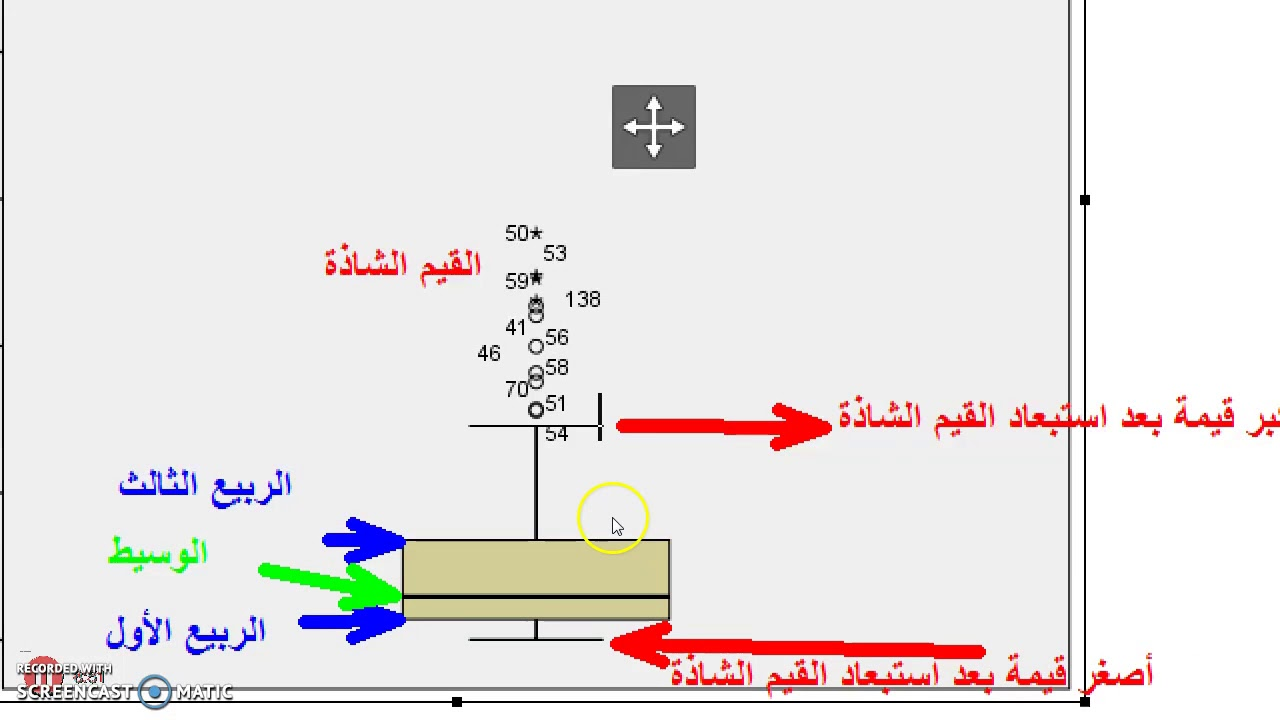

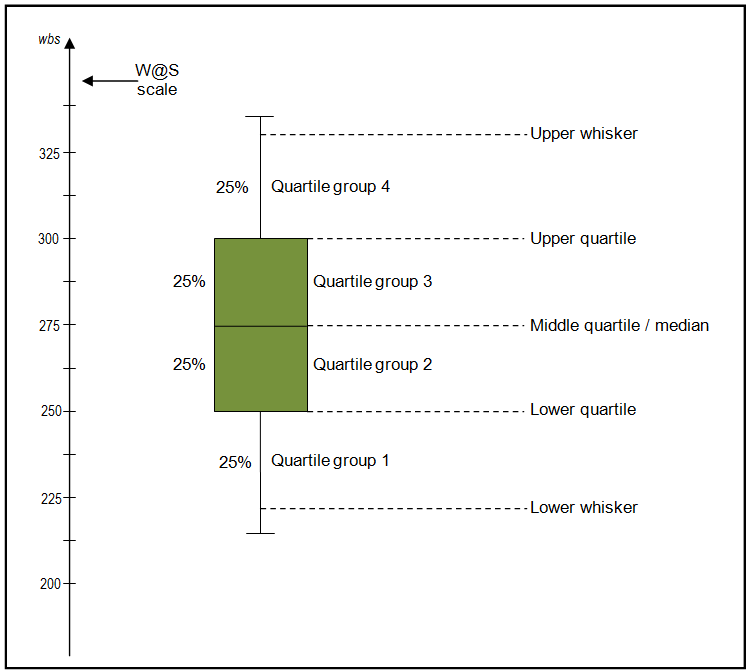

# Data sets creation    

## 1 ) Create Student's General Info. Dataset

In [ ]:
grades={
    "06":"9","07":"8",
    "08":"7", "09":"6", "10":"5", "11":"4",
    "12":"3", "13":"2", "14":"1"
}

In [ ]:
###  الطلبة العينة من 10 مدارس عشوائيًا (500 طالب) ##
##### من الصف السادس الى الثالث الاعدادي 


list_std=[]
for i in range(500):
  birth_year=random.choice(["06", "07", "08", "09","10"]) 
  student= {
  "student_id": ''.join(random.choice(string.digits) for _ in range(5)) ,
  "birth_year": birth_year,
  "birth_month": random.choice(["01", "02", "03", "04", "05", 
                                "06", "07", "08", "09","10","11","12"]),
  "school": random.choice([ "Sc_"+str(j) for j in range(10)]),
  "grade": grades[birth_year],  
  "gender": random.choice(["M", "F"]),
  "governorate": random.choice(["North", "South", "Caiptal", "Muharraq"])
         } 
  list_std.append(student)
  
      
df_st=pd.DataFrame(list_std)


In [ ]:
#####  Merge student_ID with birth year and month month to get a complete CPR

df_st.insert(0, 'student_ID', df_st['birth_year'].astype(str) + df_st['birth_month'].astype(str)+df_st.pop('student_id').astype(str))

In [ ]:
df_st.head()

In [ ]:
for col in df_st.keys():
  df_st[col]= df_st[col].astype(str)

In [ ]:
df_st.info()

In [ ]:
df_st.to_csv("./Data/General_students_info.csv")

## 2 ) Create Students' portal activity Dataset / df_avt

In [ ]:
from random_timestamp import random_timestamp
lst=[]
for i, k  in zip(df_st.student_ID, df_st.grade):
  for j in range (14, int((20*np.random.rand()+8))):
    course_id=random.choice(["g"+str(k)+"_"+str(l) for l in range(1,4)])
    ActType=random.choice(["1", "0" ])
    Act_time= [15, 2]  if ActType=='0'  else [4320, 60]
    activities= {
        "student_ID": i ,
        "Course_code":course_id,  
        "Activity_id": f"{course_id}-Act_{int(20*np.random.rand()+1)}",
        "Activity_type":ActType,
        # "Act_count": course_ref[course_id][ActType] , #np.random.randint(5,30),

      "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
      "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
      "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
      # "Competence-id":  random.choice([ "Cp_"+str(k) for k in range(10)]), 
      "Act_diff":  int((4*np.random.rand(1)+1)),
      "Act_cp_count": int((np.random.rand(1)*2+1)), 

      "Act_time": int((Act_time[0]*np.random.rand()+Act_time[1])) , ####### Quizzes from 2 mins to 15 mins // Assign. from 1 hr to 3 days
      "Act_submit_Time": random_timestamp( year=2020),
      #  add  afeature for  late submission
      "Act_mark": int((1000*np.random.rand()))/100,
    }
    lst.append(activities)
df_avt=pd.DataFrame(lst)

In [ ]:
df_avt.drop_duplicates(subset=["student_ID"	, 	"Activity_id"	, "Activity_type"] , keep="last", inplace=True)

In [ ]:
df_avt.sample(10)

In [ ]:
df_avt.info()

In [ ]:
df_avt.to_csv("./Data/Portal-Achiev-Info.csv")

## 3 ) Generate 5 selected Students Data to graph  / dt_st


In [ ]:
def dataJson(actType, i , c, act):
  Act_time= [15, 2]  if actType=='0'  else [4320, 60]
  return {
      
        "student_ID": i ,
        "Course_code":c,  
        "Activity_id": act,
        "Activity_type":actType,
          

        "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
        "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
        "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
        "Act_diff":  int((4*np.random.rand(1)+1)),
        "Act_cp_count": int((np.random.rand(1)*2+1)), 

        "Act_time": int((Act_time[0]*np.random.rand()+Act_time[1])) , ####### from 30 SEC to 15 MIN
        "Act_submit_Time":random_timestamp( year=2020),  
        #  add  a feature for  late submission
        "Act_mark": int((1000*np.random.rand()))/100,  #  this should be  float32  : 10*np.random.rand()
      }

In [ ]:
std_course=[['g5_3', 'g5_2', 'g5_1'], ['g9_3', 'g9_1', 'g9_2'],['g6_1', 'g6_3',
       'g6_2'], ['g8_1', 'g8_3', 'g8_2'], ['g7_1',  'g7_3', 'g7_2'] ]

In [ ]:
from random_timestamp import random_timestamp
lst=[]
std_array= df_avt.student_ID.unique()[:5] +"S"
for i , course in zip(std_array, std_course):# c in df_avt.Course_code.unique():
  for c in course:
    for j in [f"{c}-Act_{act}"  for act in range(10,19)]: #range (1, int((2*np.random.rand()+8))):
      lst.append(dataJson("0", i , c, j ))
    for j in [f"{c}-Act_{act}"  for act in range(1,5)]:
      lst.append(dataJson("1", i , c, j ))
     
dt_st=pd.DataFrame(lst)

In [ ]:
for s, c  in  zip(dt_st.student_ID.unique(), std_course[0]):
  count=dt_st.query(f"student_ID=='{s}' & Course_code=='{c}' & Activity_type=='1'").shape[0]
  print(f"Student:  {s}  has: {count}  records")

In [ ]:
dt_st.sample(5)

In [ ]:
dt_st.to_csv("./Data/5_selected_students.csv")  

## Create Recommendation data set

In [ ]:
def url_lobj(lob):
  
  for i in modules:
    for j in i["lessons"]:
      for k in j["lobs"]:
        if k["lobName"]==lob:
          return  k["URL"]


In [ ]:
url_lobj('Representing Data')

In [ ]:
#  Json  recommendation Initialization
modules=[
         {"unit":"Data and statistics", 
          "lessons":[
                    {"LessName": "Dot plots & frequency tables",
                    "lobs":[
                            {"lobID": 1, "lobName":"Representing Data", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/dot-plot/v/ways-to-represent-data?modal=1" },
                            {"lobID": 2,"lobName":"Frequency Tables & dot plot", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/dot-plot/v/frequency-tables-and-dot-plots?modal=1"}
                          ]
                          
                    },
                    {"LessName": "Statistical questions",
                    "lobs":[
                            {"lobID": 3, "lobName":"Statistical questions", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-statistical-questions/v/understanding-statistical-questions?modal=1"}
                          ]
                    },
                    {"LessName": "Histograms",
                    "lobs":[
                            {"lobID": 4, "lobName":"Creating a histogram", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/histograms/v/histograms-intro?modal=1"},
                            {"lobID": 5, "lobName":"Interpreting a histogram", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/histograms/v/interpreting-histograms?modal=1"}
                          ]
                    },
                    {"LessName": "Mean and median",
                    "lobs":[
                            
                                {"lobID": 6, "lobName":"Statistics Intro: Mean, Median & Mode", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/mean-and-median/v/statistics-intro-mean-median-and-mode?modal=1"}, 
                                {"lobID": 7, "lobName":"Mean, Median & Mode example", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/mean-and-median/v/mean-median-and-mode?modal=1"},
                                {"lobID": 8 , "lobName":"Calculating the mean", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/mean-and-median/a/calculating-the-mean?modal=1"}
                                
                                
                          ]
                    },
                    {"LessName": "Mean and median challenge problems",
                    "lobs":[
                             {"lobID": 9, "lobName": "Missing value given the mean", "URL": "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/using-mean-to-find-missing-value?modal=1"},
                              {"lobID":10 , "lobName":"Mean as the balancing point" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/a/mean-as-the-balancing-point?modal=1"},
                              {"lobID": 11, "lobName":"Impact on median & mean: Removing an outlier" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/impact-on-median-and-mean-when-removing-lowest-value-example?modal=1"},
                              {"lobID": 12, "lobName":"Impact on median & mean: increasing an outlier" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/impact-on-median-and-mean-when-increasing-highest-value?modal=1"},
                              {"lobID": 13, "lobName":"Median & range puzzlers" , "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-mean-median-challenge/v/median-and-range-puzzle?modal=1"}
                          ]
                    },
                    {"LessName": "Interquartile range (IQR)",
                    "lobs":[
                            {"lobID": 14, "lobName":"Interquartile range (IQR)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/v/calculating-interquartile-range-iqr?modal=1"}
                          ]
                    },
                    {"LessName": "Box Plots",
                    "lobs":[
                            {"lobID":15  , "lobName":"Reading box plots", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/reading-box-and-whisker-plots?modal=1"},
                             {"lobID":16  , "lobName":"Constructing a box plot", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot?modal=1"},
                             {"lobID":17  , "lobName":"Worked example: Creating box plot (odd number of data points)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/box-and-whisker-plot-exercise-example?modal=1"},
                             {"lobID":18  , "lobName":"Worked example: Creating box plot (even number of data points)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot?modal=1"},
                             {"lobID":19  , "lobName":"Worked example: Interpreting a box plot", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/interpreting-box-plots?modal=1"}
                          ]
                    },

                    {"LessName": "Mean absolute deviation (MAD)",
                    "lobs":[
                            { "lobID":20 , "lobName":"Mean absolute deviation (MAD)", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-mad/v/mean-absolute-deviation?modal=1"},
                              {"lobID":21 , "lobName":"Mean absolute deviation example", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-mad/v/mean-absolute-deviation-example?modal=1"}
                          ]
                    },
                    {"LessName": "Comparing Data Display",
                    "lobs":[
                            {"lobID":22 , "lobName":"Comparing dot plots, histograms and box plots", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-7th-compare-data-displays/v/comparing-dot-plots-histograms-and-box-plots?modal=1"}
                          ]
                    },
                    {"LessName": "Shape of Data Distribution",
                    "lobs":[
                            {"lobID":23 , "lobName":"Shape of distributions", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-shape-of-data/v/shapes-of-distributions?modal=1"},
                              {"lobID":24 , "lobName":"Clusters, gaps, peaks & outliers", "URL" : "https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6-shape-of-data/v/examples-analyzing-clusters-gaps-peaks-and-outliers-for-distributions?modal=1"}
                          ]
                    },
                    

                    
                    ],
           
          
          }
         ]

In [ ]:
lst=[]

md=modules[0]["lessons"]

for st in  dt_st.student_ID.unique():
  for i   in range(int(30*np.random.rand()+8)):
    RndLesson= int(len(md)*np.random.rand()-1)
    RndLob= int(len(md[RndLesson]["lobs"])*np.random.rand())
    activities= {
        "student_ID": st ,
        # "Course_code":course_id,  
        # "Unit_des":  random.choice([ "Un_"+str(k) for k in range(10)]),
        "Lesson_des": md[RndLesson]["LessName"],

        "lobj_id": md[RndLesson]["lobs"][RndLob]["lobID"], 
        "lobj_des": md[RndLesson]["lobs"][RndLob]["lobName"],  
        # "Subcps": [ subcp[s]  for   i in range (1, int((len(subcps)*np.random.rand()+2)))] 

    }
    lst.append(activities)
df_recommend=pd.DataFrame(lst)

In [ ]:
df_recommend["LearningObj"]=df_recommend.Lesson_des+" "+ df_recommend.lobj_des

In [ ]:
df_recommend.to_csv("./Data/recommend.csv")

## Data Preparation for prediction

In [ ]:
df_avt.tail()

In [ ]:
dt_st.tail()

In [ ]:
#  Add  5 selected student used  in the Graph Above

#df_avt= df_avt.drop("Act_submit_Time", axis=1).reset_index().append( dt_st.reset_index())


df_avt= df_avt.append(dt_st.reset_index())

In [ ]:
df_avt.drop([  "Unit_id", "Chapter_id", "Lesson_id"], inplace=True, axis=1)

In [ ]:
df_avt.tail()

In [ ]:
#  4  dashboard
#plt.rcParams.update({'font.size': 12})
#df_avt[["Act_mark"]].groupby(pd.Grouper(freq="W")).agg("mean").plot()

In [ ]:
df_act_Stat=pd.pivot_table(df_avt, index=["Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp_count", "Act_time" , "Activity_id"]   , aggfunc={
                   "Act_mark":("mean","max", "count", "min"), 
                   "Act_diff": "mean",
                   "Act_cp_count": "mean",
                   "Act_time": ("mean", "max", "min"),
                   "Activity_id": lambda x: x.nunique()
               }).rename(columns={
                   "Activity_id" :  "Activities_Count"  #  number of activities
#                 "Act_mark":"Std_act_m", 
#                    "Act_diff": "Std_act_d",
#                    "Act_cp_count": "Std_act_cp",
#                    "Act_time": "Std_act_t"  

               })


In [ ]:
df_avt.head(10)

In [ ]:
df_avt.query(f"student_ID=='090904691'").groupby(["Course_code", "Activity_type"]).student_ID.agg("count")

In [ ]:
df_avt.groupby(["Course_code", "Activity_type"]).student_ID.agg("count")

In [ ]:
df_avt[df_avt.Course_code=='g8_1'].groupby("Activity_type").student_ID.agg("count")

In [ ]:
df_act_Stat.sample(5)

In [ ]:
df_act_Stat.columns=[f"{i}_{j}" for  i , j in df_act_Stat.columns]

In [ ]:
df_avt[(df_avt.Course_code=="g6_1")&(df_avt.Activity_type=="0")].describe()

## Students' Achievement Statistics (( df_std ))  (( df_mg ))

In [ ]:
df_std_Stat=pd.pivot_table(df_avt, index=["student_ID","Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp_count", "Act_time" ]   , aggfunc={
                   "Act_mark":("mean","max", "count", np.std, "last"), 
                   "Act_diff": "mean",
                   "Act_cp_count": "mean",
                   "Act_time": ("mean", "max", np.std)
               },  fill_value=0 ).rename(columns={
                "Act_mark":"Std_act_m", 
                   "Act_diff": "Std_act_d",
                   "Act_cp_count": "Std_act_cp",
                   "Act_time": "Std_act_t"   

               })
df_std_Stat.head()

In [ ]:
df_avt.sample()

In [ ]:
df_avt[(df_avt.student_ID=="080607421")& (df_avt.Course_code=="g7_3")]

In [ ]:
df_std_Stat.columns=[f"{i}_{j}" for  i , j in df_std_Stat.columns]

In [ ]:
df_std_Stat.sample(5)

- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_std_Stat["Act_score"]=np.log1p( 
    df_std_Stat.Std_act_t_max/df_std_Stat.Std_act_t_mean +df_std_Stat.Std_act_d_mean* df_std_Stat.Std_act_cp_mean
)*df_std_Stat["Std_act_m_max"]**2/df_std_Stat.Std_act_m_mean

In [ ]:
# reset index   for  Students    data
df_std_Stat.reset_index(inplace=True)
# reset index for   activities data
df_act_Stat.reset_index(inplace=True)

In [ ]:
# Merge Data
df_mg=df_std_Stat.merge(df_act_Stat,  on=["Course_code", "Activity_type"])

In [ ]:
df_mg.query(f"student_ID=='080554476'")

In [ ]:
df_mg["last_mark"]=df_mg.Std_act_m_last  # put the target at the end of table
df_mg.drop("Std_act_m_last", axis=1, inplace=True)  #  drop the last mark feature.

In [ ]:
df_mg.sample(3)

In [ ]:
df_mg.info()

In [ ]:
df_mg.to_csv("./Data/student_statistics.csv")

# Linear Regression & Classification

## Pipeline    SGB Regressor  Mark Prediction 
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
df_mg.set_index("student_ID", inplace=True)

In [ ]:
# Split Data

X_train=df_mg.drop(dt_st.student_ID.unique(), axis = 0).iloc[:,:-1]
y=df_mg.drop(dt_st.student_ID.unique(), axis = 0).iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

In [ ]:
preprocess.fit_transform(X_train)[0]

In [ ]:
# pipelline Model

from xgboost import XGBRegressor
pipe_reg= make_pipeline(
    preprocess, 
    XGBRegressor(objective="reg:squarederror")
    )

In [ ]:
pipe_reg.get_params()

In [ ]:
# hyper parameters

param_grid={
    "xgbregressor__learning_rate": [0.01, 0.1],
    "xgbregressor__max_depth" : [3,5,7, 10] ,
    "xgbregressor__min_child_weight" :[1,3,5],
    "xgbregressor__subsample": [0.5, 0.7],
    "xgbregressor__colsample_bytree": [0.5, 0.7],
    "xgbregressor__n_estimators": [200, 400, 1000]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring="neg_mean_squared_error", cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
df_mg.loc[dt_st.student_ID.unique(), :].iloc[:, :-1].sample()

In [ ]:
y_pred=gs.predict(X_train)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y, y_pred):.3f}")

In [ ]:
# Residual Plot

import seaborn as sns
_= sns.residplot(x=y, y=y_pred, color="green")

In [ ]:
predict_std = df_mg.loc[dt_st.student_ID.unique(), :].iloc[:, :-1]

In [ ]:
gs.predict(predict_std)

In [ ]:
predict_std["last_mark"]=gs.predict(predict_std)

In [ ]:
predict_std.head()

In [ ]:
predict_std.to_csv("./Data/predicted_data.csv")

## Pipeline    SGB Classsifier  Classification  Prediction   ((( ERROR ))
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
df_stClass= df_mg.copy()

In [ ]:
df_stClass.head()

- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_stClass.Act_score.describe().T

In [ ]:
df_stClass.Act_score.quantile(0.25)

In [ ]:
#  feature  Engineering

bins = [0, 
        df_stClass.Act_score.quantile(0.25),
        df_stClass.Act_score.quantile(0.5),
        df_stClass.Act_score.quantile(0.75), 
        df_stClass.Act_score.quantile(1)]
names = ['D', 'C', 'B', 'A']

df_stClass['Score_Class'] = pd.cut(df_stClass.Act_score,
                           bins, labels=names)

In [ ]:
df_stClass.head()

#  It's better to add data related to  timestamp feature:  dat, month, dayofteweek, monthOfTheyear .....

In [ ]:
df_stClass.drop("Act_score", axis=1, inplace=True)

In [ ]:
# Split Data

X=df_stClass.iloc[:,:-1]
y=df_stClass["Score_Class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y  , test_size=.3,   random_state=42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

In [ ]:
preprocess.fit_transform(X_train)[0]

In [ ]:
# pipelline Model

from xgboost import XGBClassifier
pipe_reg= make_pipeline(
    preprocess, 
    XGBClassifier()
    )

In [ ]:
pipe_reg.get_params()

In [ ]:
# hyper parameters

param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    
}

In [ ]:
# AUC and accuracy as score

from sklearn.metrics import accuracy_score, make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label="yes", average="micro")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring=scorer,  cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
X_test.sample()

In [ ]:
std_Pred=X_test.loc["061108800"]

In [ ]:
gs.predict(X_test.loc["061108800"])

In [ ]:
std_Pred["Predicted_mark"]=gs.predict(X_test.loc["070229174S"])

In [ ]:
std_Pred

In [ ]:
y_pred=gs.predict(X_test)

In [ ]:
#  Last Mark Comparaison

pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

In [ ]:
X_test["predicted_Mark"]=y_pred

# Old stuff

In [ ]:
def plot_std_Data(st, cs,chk,  status=False):
  course.options = std_d[st]
  plt.rcParams.update({'font.size': 25})
  

  #  subplots   x, y  :  should be related to the number of Activity_type of current student.

  list_rec=recommend( st)


  fig, ax=plt.subplots(1, 2, figsize=(10,10) )
  plt.subplots_adjust(top = 0.99, bottom=0.01,wspace=0.4, hspace= 0.4)

  if status:
    ref_q=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='0' ").Act_submit_Time.max()
    xq_point=[ref_q, ref_q+ timedelta(days=7)]
    yq_point=[dt_st.loc[ref_q, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[0,1].plot(xq_point , yq_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)
    

    ref_a=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='1' ").Act_submit_Time.max()
    xa_point=[ref_a, ref_a+ timedelta(days=7)]
    ya_point=[dt_st.loc[ref_a, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[0,0].plot(xa_point , ya_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)


  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='{chk}'").Act_mark.plot( 
      subplots=True,marker="o",    ax=ax[0] , color="brown")
   
 
  

  # dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='0'").Act_mark.plot( 
  #     subplots=True, marker="s",   ax=ax[0,1] , color="brown")

  # add time Avg per Activity

  # ax4=ax[0].twinx()
  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='{chk}'").Act_time.plot( 
      subplots=True, marker="s",   ax=ax[1] , color="green")



  # ax3=ax[1,0].twinx()
  # dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='0'").Act_time.plot( subplots=True, marker="s",   ax=ax3 , color="green")

  Alabel="Assignments Mark"   if chk  else  "Quizz Mark "
  Atitle= " Assignement Mark Trend / Month Timeline"  if chk   else " Quizz Mark Trend / Month Timeline"

  # ---------------------------------------------------------------------
  # Set title and labels for axes
  ax[0].set(xlabel="Dates",
        ylabel= Alabel,  # "Assignments Mark",
        title=Atitle ) # Assignement Mark Trend / Month Timeline")
  fig.autofmt_xdate(rotation=45)

  ax[0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  
# ----------------------------------------------------------------------
  # ax[0,1].set(xlabel="Dates",
  #       ylabel="Quizzes Marks",
  #       title=" Quizzes Marks Trend / Month Timeline")
  Qlabel="Assignments Time"   if chk  else  "Quizz Time "

  ax[1].set(
        ylabel=  Qlabel # "Quizz Mark"
        )
  ax[1].grid()
  ax[1].legend()
  
  # ---------------------------------------------------------------------
  # ax[1,1].set(ylabel="Quizzes Submission time ",
  #       title= "Quizzes Time Submission Trend / Month")
  # # ----------------------------------------------------------------
  # ax[1,0].set(xlabel="Dates",
  #       ylabel="Assignments Subission Time",
  #       title="Assignments Time Submission Trend / Month")

  fig.autofmt_xdate(rotation=45)
#-----------------------------------------------------------------------
 
  # ax[0].grid()
  # ax[0,1].grid()
  # ax[1,0].grid()
  # ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  ax[0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

  #---------------------------------------
  # ax[0].legend()
  # ax4.legend()
  # ax[0,1].legend()
      
  plt.show()

In [ ]:
def plot_std_Data(st, cs, status=False):
  course.options = std_d[st]
  plt.rcParams.update({'font.size': 25})
  

  #  subplots   x, y  :  should be related to the number of Activity_type of current student.


  fig, ax=plt.subplots(2, 2, figsize=(30,20) )
  plt.subplots_adjust(top = 0.99, bottom=0.01,wspace=0.4, hspace= 0.3)

  if status:
    ref_q=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='0' ").Act_submit_Time.max()
    xq_point=[ref_q, ref_q+ timedelta(days=7)]
    yq_point=[dt_st.loc[ref_q, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[1,1].plot(xq_point , yq_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)
    # ax[1,1].axvline(x=xq_point, c='red', lw=2, alpha=0.5, ls='--')
    

    ref_a=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='1' ").Act_submit_Time.max()
    xa_point=[ref_a, ref_a+ timedelta(days=7)]
    ya_point=[dt_st.loc[ref_a, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[1,0].plot(xa_point , ya_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)
    # ax[1,0].axvline(x=xa_point, c='red', lw=2, alpha=0.5, ls='--')


  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='1'").Act_mark.plot( 
      subplots=True,marker="o",    ax=ax[1,0] , color="brown")
   
  # dt_st.query(f"Course_code=='{cs}' & Activity_type=='1'").Act_mark.plot( 
  #     subplots=True,marker="o",    ax=ax[0, 0] , color="brown")
  
  

  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='0'").Act_mark.plot( 
      subplots=True, marker="s",   ax=ax[1,1] , color="brown")

  # add time Avg per Activity

  ax4=ax[0,1].twinx()
  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='1'").Act_time.plot( 
      subplots=True, marker="s",   ax=ax4 , color="green")



  ax3=ax[0,0].twinx()
  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='0'").Act_time.plot( subplots=True, marker="s",   ax=ax3 , color="green")

  
  # ---------------------------------------------------------------------
  # Set title and labels for axes
  ax[1,0].set(xlabel="Dates",
        ylabel="Assignments Mark",
        title=" Assignement Mark Trend / Month Timeline")
  fig.autofmt_xdate(rotation=45)

  ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  
# ----------------------------------------------------------------------
  ax[1,1].set(xlabel="Dates",
        ylabel="Quizzes Marks",
        title=" Quizzes Marks Trend / Month Timeline")
  ax4.set(
        ylabel="Quizz Mark"
        )
  ax4.grid()
  ax4.legend()
  
  # ---------------------------------------------------------------------
  ax[0,1].set(ylabel="Quizzes Submission time ",
        title= "Quizzes Time Submission Trend / Month")
  # ----------------------------------------------------------------
  ax[0,0].set(xlabel="Dates",
        ylabel="Assignments Subission Time",
        title="Assignments Time Submission Trend / Month")

  fig.autofmt_xdate(rotation=45)
#-----------------------------------------------------------------------
  ax[1,0].grid()
  ax[1,1].grid()
  ax[0,0].grid()
  ax[0,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

  #---------------------------------------
  ax[1,0].legend()
  ax3.legend()
  ax[1,1].legend()
      
  plt.show()
  

In [ ]:
@interact(st = stID, cs = course, chkbx= box)
def plot_data( st, cs, chkbx):
  print(((chkbx)+0))
  
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data(st, cs, ((chkbx)+0))

In [ ]:
# xs@interact(st = stID, cs = course)
# def plot_data( st, cs):xs
#   plot_std_Data(st, cs)

In [ ]:
@interact(st = stID, cs = course)
def plot_data( st, cs):
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data(st, cs)

## Compare the selected student's achievments with his colleagues (( box plot ))

In [ ]:
# For the Boxplot plt.boxplot(df_avt.query("Activity_id=='g5_3-Act_10'").Act_mark)

In [ ]:
dt_st.sample()

In [ ]:
fig, ax=plt.subplots(figsize=(10,10) )
ax.plot(
    dt_st.reset_index().query(f"student_ID=='080646195S' & Course_code=='g8_1' & Activity_type=='0' ").Act_submit_Time.max() + timedelta(days=7) , 
    predict_std.reset_index().query(f"student_ID=='080646195S'  & Course_code=='g8_1' & Activity_type=='0' ").last_mark
       , marker="o" )
ax.plot(
    dt_st.reset_index().query(f"student_ID=='080646195S' & Course_code=='g8_1' & Activity_type=='0' ").Act_submit_Time.max() + timedelta(days=14) , 
    predict_std.reset_index().query(f"student_ID=='080646195S'  & Course_code=='g8_1' & Activity_type=='0' ").last_mark+1.5
       , marker="o" )

In [ ]:
ref= dt_st.reset_index().query(f"student_ID=='101235516S' & Course_code=='g5_3' & Activity_type=='0' ").Act_submit_Time.max()
dt_st.loc[ref, "Act_mark"]


In [ ]:
dt_st.reset_index().query(f"student_ID=='101235516S' & Course_code=='g5_3' & Activity_type=='0' ")

In [ ]:
plt.boxplot(df_avt.query("Activity_id=='g5_3-Act_12'")["Act_mark"])

In [ ]:
plt.boxplot(df_avt.query("student_ID=='090888097S' & Course_code=='g8_1' & Activity_type=='0'").Act_mark)

In [ ]:
df_avt.index= df_avt.Act_submit_Time

## Graph all the students achievment in a specific subject

In [ ]:
#  Create  the index
# df_avt["Act_submit_Time"]= pd.to_datetime(df_avt.Act_submit_Time)
df_avt.index=df_avt["Act_submit_Time"]
df_avt.sample()

In [ ]:
import plotly.graph_objs as go

@interact(sbj=df_avt.Course_code.unique())
def plot_subject(sbj):
  plt.rcParams.update({'font.size': 25})
  x = np.arange(10)
  layout = go.Layout(
    autosize=False,
    width= 1200 , height= 600 )
  fig=go.Figure(layout=layout)

  fig.add_trace(go.Scatter(      
      x=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
      y=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
      , mode='lines+markers', name="Quiz"))

  fig.add_trace(go.Scatter(
      x=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
      y=df_avt[(df_avt.Course_code==sbj)&(
          df_avt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
     , mode='lines+markers' ,  name="Assignment"))



  
  fig.update_layout(hovermode="x" , 
      # title="أداء جميع الطلبة في مادة معينة",
    xaxis_title="Submit Time",
    yaxis_title="Mark",
    # font=dict(import plotly.graph_objs as go

    #     family="Courier New, monospace",
    #     size=18,
    #     color="#7f7f7f")
     title={
        'text': "أداء جميع الطلبة في مادة معينة",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}) 
  fig.show()


## Compare the selected student's Quiz and Assignm. with Average of all students

In [ ]:
df_ActAv=pd.pivot_table(df_avt, index=["Course_code", "Activity_type", "Activity_id"], 
               values=["Act_diff", 	"Act_cp_count", 	"Act_time" , 	"Act_mark"] , aggfunc=("mean")).rename(
   columns={
    "Act_diff": "Act_diff_avg", 	
    "Act_cp_count": "Act_cp_avg", 	
    "Act_time" : "Act_time_avg" , 	
    "Act_mark" : "Act_mark_avg" 
   } 
)

In [ ]:
df_ActAv.head()

In [ ]:
df_ActAv.shape

In [ ]:
df_avt.loc["2020-09"].head()

In [ ]:
df_avt.groupby(["student_ID", "Activity_type"]).agg("count").max()

In [ ]:
df_avt[df_avt.student_ID=="080237875"].loc[: ,["Course_code", "Activity_type" , "Activity_id", "Act_diff", 	"Act_cp_count", 	"Act_time"	,"Act_mark"]]

In [ ]:
df_plt=df_avt[df_avt.student_ID=="100611764"].loc["2020-4":"2021-2" ,["Course_code", "Activity_type" , "Activity_id", "Act_diff", 	"Act_cp_count", 	"Act_time"	,"Act_mark"]]

In [ ]:
df_plt.groupby("Course_code").Activity_id.agg("count")

In [ ]:
df_plt.reset_index(inplace=True)

In [ ]:
df_plt=df_plt.merge( df_ActAv, on=["Activity_type", "Activity_id" ])

In [ ]:
df_plt.keys()

In [ ]:
df_plt.set_index("Act_submit_Time", inplace=True)

In [ ]:
# this is dataset for a particular Student.
df_plt.head()

In [ ]:
df_plt["Activity_type"]=df_plt.Activity_type.astype(int)  

In [ ]:
df_plt[df_plt.Activity_type==0]["Act_mark"]

In [ ]:
df_plt.info()

In [ ]:
df_plt[df_plt.Activity_type==1]["Act_mark"]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [ ]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)

df_plt[df_plt.Activity_type==0]["Act_mark"].sort_index().plot( marker="o" , color="blue", label="Assignements Mark", ax=ax1)
ax2=ax1.twinx()
df_plt[df_plt.Activity_type==0]["Act_mark_avg"].sort_index().plot( ax=ax2, marker="s" , color="green", label="Average Assignement Marks" )

#plt.legend()
ax1.legend()
ax2.legend(loc="lower right")
ax1.grid()
ax2.set_ylabel("Assign. Avg. Mark")
ax1.set_ylabel("Assign. Mark")




ax1.set(xlabel="Dates",
        #ylabel="Quizzes Marks",
        title="Assign. Mark VS Assign. Avg Mark Timeline"        )
fig.autofmt_xdate(rotation=45)

In [ ]:
#####  TRY TO PLOT IT IN ATRACTIVE WAY

In [ ]:
import plotly.graph_objs as go
@interact(sbj=df_avt.Course_code.unique())
def plot_subject(sbj):
  plt.rcParams.update({'font.size': 25})
  x = np.arange(10)
  layout = go.Layout(
    autosize=False,
    width= 1200 , height= 600 )
  fig=go.Figure(layout=layout)

  fig.add_trace(go.Scatter(      
      x=df_plt[(df_plt.Course_code==sbj)&(
          df_plt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_time"].sort_index(), 
      y=df_plt[(df_plt.Course_code==sbj)&(
          df_plt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
      , mode='lines+markers', name="Quiz"))



  # fig.add_trace(go.Scatter(      
  #     x=df_plt[(df_plt.Course_code==sbj)&(
  #         df_plt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
  #     y=df_plt[(df_plt.Course_code==sbj)&(
  #         df_plt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
  #     , mode='lines+markers', name="Assignment"))




  
  fig.update_layout(hovermode="x" , 
      # title="أداء جميع الطلبة في مادة معينة",
    xaxis_title="Submit Time",
    yaxis_title="Mark",
    # font=dict(
    #     family="Courier New, monospace",
    #     size=18,
    #     color="#7f7f7f")
     title={
        'text': "أداء جميع الطلبة في مادة معينة",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}) 
  fig.show()


## Graph the predicted mark of a specific student

In [ ]:
#  NUmber of Assignments is less then Quizzes
@interact(st = stID, cs = course)
def plot_data( st, cs):
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  
  plot_std_Data(st, cs, True )

In [ ]:
a=df_avt.Activity_id.unique()

In [ ]:
b= dt_st[dt_st.student_ID=="070368745S"]["Activity_id"].unique()

In [ ]:
b

In [ ]:
c=df_avt.loc[df_avt['Activity_id'] == b]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dfx=pd.DataFrame({'S':np.random.randint(10,100,9)*10,'C': 
['X','X','X','Y','Y','Y','Z','Z','Z']})

fig,ax=plt.subplots()
mx=dfx.groupby('C')['S'].median()
sns.boxplot(y='S',x='C',data=dfx,ax=ax)
sns.lineplot(y=mx.values,x=mx.index,ax=ax)
plt.show()

## Recommendation 



In [ ]:
dt_st.head()

In [ ]:
target_st = dt_st[["student_ID",	"Course_code",	"Activity_id"]].query("student_ID=='100222464S' ")

In [ ]:
target_st.Activity_id.unique()

In [ ]:
target_st.drop_duplicates(subset=["Course_code"], keep="last", inplace=True)

In [ ]:
target_st

In [ ]:
def recommend( c, a, q, sb, lob):
  return {
          #"student_ID": i ,
          "Course_code":c,  
          "Activity_id": a,
                    

        "q_id": q,
        "subcp_id":sb, 
        "lob_id": lob,
      }

In [ ]:
[  f"{id} the color {col} id encoded  ans {code}"  for id,  code, col in  zip([1, 2, 3], ["#0000FF", "#ccaaFF", "#77aabb"], ["Blue", "Yellow", "Magenta"])]

In [ ]:
for  course , act in zip(target_st.Course_code , target_st.Activity_id):
  print( course + " " +   act)

In [ ]:
lst=[]
#std_array= dt_st.student_ID
std_course= dt_st.query("student_ID=='100222464S'").Course_code.unique()
std_act= dt_st.query("student_ID=='100222464S'").Activity_id.unique()

for  course , act in zip(target_st.Course_code , target_st.Activity_id):# c in df_avt.Course_code.unique():
  for Q in range(int(4*np.random.rand()+2)):
      for subcp in range(int(3*np.random.rand()+2)):
        for lob  in range(int(6*np.random.rand()+2)):
          lst.append(recommend(course, act, f"Q_{Q}", f"subcp_{subcp}", f"lob_{lob}" ))
               
target_st=pd.DataFrame(lst)

In [ ]:
target_st.query("Course_code=='g5_2'").lob_id.sample(5).unique()

In [ ]:
def dataJson(c, act):
  return {
          "Course_code":c,  
          "Activity_id": act,
          
          

        # "subcp_id": random.choice([ "sub_"+str(k) for k in range(1,4)]), 
        # "lob_id": random.choice([ "lob_"+str(k) for k in range(1,50)]),
        # "cp_id":  random.choice([ "cp_"+str(k) for k in range(1,9)])
      }

In [ ]:
from random_timestamp import random_timestamp
lst=[]
std_course= dt_st.Course_code
std_act= dt_st.Activity_id

for  course, i in zip(std_course , std_act):# c in df_avt.Course_code.unique():
  for n in i:
    for j in [f"q_{act}"  for act in range(10,19)]: #range (1, int((2*np.random.rand()+8))):
      lst.append(data( course , n))
    
     
n=pd.DataFrame(lst)

In [ ]:
###########    OLD VERSION     #############

In [ ]:
df_avt.head()

In [ ]:
df_avt = df_avt.reset_index()

In [ ]:
df_avt = df_avt.drop(['Act_submit_Time'], axis = 1)

In [ ]:
questions = pd.DataFrame()

In [ ]:
questions["Activity_id"] = df_avt["Activity_id"]
questions["Activity_type"] = df_avt["Activity_type"]

In [ ]:
questions.head()

In [ ]:
#questions = questions.reset_index()

In [ ]:
#questions = questions.drop(['Act_submit_Time'], axis = 1)

In [ ]:
#questions.head()

In [ ]:
#### 1 Activity id shold hold ( from 5 to 10 questions)

questions['quest_id'] = np.random.randint(1, 1001, questions.shape[0])
#questions['quest_id'] =random.choice( ["q_"+str(j) for j in range(1,1001)] , questions.shape[0] )

In [ ]:
questions.head()

In [ ]:
questions.shape

In [ ]:
cp_for_quest = pd.DataFrame()

In [ ]:
cp_for_quest["quest_id"] = questions["quest_id"]

In [ ]:
cp_for_quest.head()

In [ ]:
####### 1 question id should hold between ( 1 to 3 sub cps)

cp_for_quest['sub_cp_id'] = np.random.randint(1, 4501, cp_for_quest.shape[0])  ##### estimated 4500 sub cp in all subjects

In [ ]:
cp_for_quest.head()

In [ ]:
####  1 cp should hold 1 to 3 sub_cps  ( each sub_cp   should match 1 learning object // doc - video .....)

sub_cp = pd.DataFrame()

In [ ]:
sub_cp['cp_id'] = np.random.randint(1, 1501, cp_for_quest.shape[0])   ##### estimated 1500 cp in all subjects

In [ ]:
sub_cp['sub_cp_id'] = cp_for_quest['sub_cp_id'] 

In [ ]:
sub_cp['lo_id'] = np.random.randint(1, 5001, cp_for_quest.shape[0])  ##### estimated 5000 learning object in all subjects

In [ ]:
sub_cp.head()

### Export to HTML

## Export_graph_to_HTML

In [ ]:
import plotly
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
# Create a trace
data = [go.Scatter(
    x = df['data'],
    y = df['totale_positivi'],
)]
layout = go.Layout(
        xaxis=dict(
            title='Data',    
        ),
        yaxis=dict(
            title='Totale positivi',  
        )
    )
fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show()

In [ ]:
plotly.offline.plot(fig,filename='positives.html',config={'displayModeBar': False},auto_open = True)

In [ ]:
#webbrowser.open('file://' + os.path.realpath(positives.html))

with open('positives.html', 'r') as f:
    html_string = f.read()

End of Try 1

Try 2

In [ ]:
!pip install plotly
!pip install chart_studio

In [ ]:
import plotly.express as px
import chart_studio

In [ ]:
gapminder = px.data.gapminder()
gapminder

In [ ]:
gapminder = px.data.gapminder()
fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [ ]:
username = 'Eng.aldoseri' # your username
api_key = '7MU0wS3Gp1VOF6IqRFiw' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
import chart_studio.plotly as py
py.plot(fig, filename = 'gdp_per_cap', auto_open=True)

In [ ]:
####### implemented to our dataset

In [ ]:
#gapminder = px.data.gapminder()
fig = px.scatter(dt_st.query("student_ID=='080102434S'"), x="Act_submit_Time", y="Act_mark",  color="Course_code",size="Act_mark",
           hover_name="Act_mark")
fig.show()

In [ ]:
username = 'Eng.aldoseri' # your username
api_key = '7MU0wS3Gp1VOF6IqRFiw' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
import chart_studio.plotly as py
py.plot(fig, filename = 'gdp_per_cap', auto_open=True)

End of Try 2

Try 3

In [ ]:
import plotly.graph_objs as go
import plotly as plotly
import plotly.express as px

In [ ]:
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)

In [ ]:
plotly.offline.plot(fig, filename= "output_filename" + ".html")


## Dashboard Graph

## Add radio button to the graph

In [ ]:
###### try to add radio button

In [ ]:
std_d={}
for st in  dt_st.student_ID.unique():
  std_d[st]=dt_st[dt_st.student_ID==st]["Course_code"].unique()

In [ ]:
from ipywidgets import interact, Dropdown, Checkbox

stID = Dropdown(options = std_d.keys())
course = Dropdown(options = std_d[stID.value]) # options = std_d[stID.value] is to remove inital error but not that necessary.
box = Checkbox(False, description='Quizz/Assignment')


@interact(st = stID, cs = course, chkbx= box)
def print_cs(st, cs,chkbx ):
    course.options = std_d[st] # Here is the trick, i.e. update course.options based on st, namely stID.value.
    # print(st, cs)
    dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}'")

In [ ]:
std="070327176S"
cs="g5_2"
st_type_0= dt_st.query(f"student_ID=='{std}' & Course_code=='{cs}' & Activity_type=='0'")
st_type_1= dt_st.query(f"student_ID=='{std}' & Course_code=='{cs}' & Activity_type=='1'")




#### to add radio button


def f(actype):
    control = actype
    if control == 'Quiz': 
        data=st_type_0
        #data.plot()
        #plt.show()

    elif control== 'Assignment':
        data=st_type_1
        #data.plot()
        #plt.show() 
    return actype


interact(f, actype = widgets.RadioButtons(
options=['Quiz', 'Assignment'],
description='Choose:',
disabled=False))





############ end of radio button 

dt_st.loc["Act_submit_Time"]=dt_st["Act_submit_Time"].astype(str)
dt_tmp= dt_st.query(f"student_ID=='{std}' & Course_code=='{cs}' ")[["Act_mark", "Activity_id","Act_submit_Time" ]]
dt_tmp["Act_submit_Time"]=pd.to_datetime(dt_tmp.Act_submit_Time, format="%Y-%m-%d")
dt_tmp.sort_values(by= "Act_submit_Time", inplace=True)
# dt_tmp["Act_submit_Time"]= dt_tmp.Act_submit_Time.astype("category")


# selected student activities
dt_tmp

In [ ]:
# All Students having the same Activity as ABove
df_stAct=pd.DataFrame()

avt_type_0= df_avt.query(f" Activity_id=='{std}' & Activity_type=='0'")
avt_type_1= df_avt.query(f"Activity_id=='{std}' & Activity_type=='1'")



Mark_type= avt_type_1   if chk  else  avt_type_0
Time_type= avt_type_1  if chk   else avt_type_0


for col, time in zip(
    dt_tmp["Activity_id"],
    dt_tmp.Act_submit_Time.unique()):
  df_bx=pd.DataFrame()
  df_bx=df_avt.query(f"Activity_id== '{col}' ###### TYPE")[["Activity_id", "Act_mark"]]
  df_bx["Act_submit_Time"]= pd.to_datetime(time).strftime("%Y-%m-%d")
  df_stAct= pd.concat([
                       df_stAct, df_bx
  ])
df_stAct.sort_values(by="Act_submit_Time", inplace=True)
df_stAct["Act_submit_Time"]= df_stAct.Act_submit_Time.astype("category")
df_stAct

In [ ]:
#Combine Graph
import seaborn as sns 
import matplotlib.pyplot as plt

fg, ax= plt.subplots( figsize=(20,8))


sns.boxplot(x="Activity_id" ,  y= "Act_mark", data=df_stAct , ax=ax ,width= 0.3)
sns.lineplot(
    x="Activity_id",
    y= "Act_mark", marker='o',
    data=dt_tmp  , ax=ax )
ax.set_xticklabels(dt_tmp.Act_submit_Time.unique())
plt.title("Student's mark compared to other students" , fontsize=20)
plt.xlabel("Date" , fontsize=20)
plt.ylabel("Mark" , fontsize=20)
plt.xticks(rotation=45)
plt.grid()
plt.show()



## Add check box to old graph

In [ ]:
####  edit old graph 

In [ ]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib.dates import DateFormatter

In [ ]:
dt_st.info()

In [ ]:
std_d={}
for st  in (dt_st.student_ID.unique() ):
  std_d[st]=dt_st[dt_st.student_ID==st]["Course_code"].unique()



# dt_tmp= dt_st.query(f"student_ID=='{std}' & Course_code=='{cs}' & Activity_type=='0'")[["Act_mark", "Activity_id","Act_submit_Time" ]]
# dt_tmp["Act_submit_Time"]=pd.to_datetime(dt_tmp.Act_submit_Time, format="%Y-%m-%d")
# dt_tmp.sort_values(by= "Act_submit_Time", inplace=True)

In [ ]:
from ipywidgets import interact, Dropdown, Checkbox

stID = Dropdown(options = std_d.keys())
course = Dropdown(options = std_d[stID.value]) # options = std_d[stID.value] is to remove inital error but not that necessary.
box = Checkbox(False, description='View Assignments')


@interact(st = stID, cs = course, chkbx= box )
def print_cs(st, cs,chkbx ):
    course.options = std_d[st] # Here is the trick, i.e. update course.options based on st, namely stID.value.
    # print(st, cs)
    dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}'")



In [ ]:
def plot_std_Data(st, cs, chk ,time_sec , status=False):
  course.options = std_d[st]
  plt.rcParams.update({'font.size': 25})
  

  #  subplots   x, y  :  should be related to the number of Activity_type of current student.


  fig, ax=plt.subplots(1, 2, figsize=(30,7) )
  plt.subplots_adjust(top = 0.99, bottom=0.01,wspace=0.4)



##########----------------------------   FOR PREDICTON PURPOSE  ---------------------------------------------------##########
  if status:
    ref_q=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='0' ").Act_submit_Time.max()
    xq_point=[ref_q, ref_q+ timedelta(days=7)]
    yq_point=[dt_st.loc[ref_q, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[0,1].plot(xq_point , yq_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)
    

    ref_a=dt_st.reset_index().query(f"student_ID=='{st}' & Course_code=='{cs}' & Activity_type=='1' ").Act_submit_Time.max()
    xa_point=[ref_a, ref_a+ timedelta(days=7)]
    ya_point=[dt_st.loc[ref_a, "Act_mark"]       , predict_std.reset_index().query(f"student_ID=='{st}'  & Course_code=='{cs}' & Activity_type=='0' ").last_mark]
    ax[0,0].plot(xa_point , ya_point, linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=12)

###########-----------------------------------------------------------------------------------------------------##########



  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='{chk}' & Act_submit_Time=='{time_sec}'").Act_mark.plot( 
      subplots=True,marker="o",    ax=ax[0] , color="brown")
   
 
  dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}' & Activity_type=='{chk}' & Act_submit_Time=='{time_sec}'").Act_time.plot( 
      subplots=True, marker="s",   ax=ax[1] , color="green")


    # ---------------------------------------------------------------------
  # Set title and labels for left graph
  
  left_label="Assignments Mark"   if chk  else  "Quizz Mark "
  left_title= " Assignement Mark / Month Timeline"  if chk   else " Quiz Mark / Month Timeline"
  

  #ax[0].set_xticklabels(dt_st.Act_submit_Time.unique())


  ax[0].set(xlabel=time_sec,
        ylabel= left_label,  
        title=left_title ) 
  fig.autofmt_xdate(rotation=45)

  ax[0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  ax[0].grid()
  ax[0].legend()
  ax[0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))


# ----------------------------------------------------------------------

  # Set title and labels for right graph

  right_label="Assignments Time"   if chk  else  "Quizz Time "
  right_title= " Assignement Submition Time / Month Timeline"  if chk   else " Quiz Submition Time / Month Timeline"
 

  ax[1].set(
        ylabel=  right_label, # "Quizz Mark"
        title=right_title )
  ax[1].grid()
  ax[1].legend()
  
  fig.autofmt_xdate(rotation=45)
#-----------------------------------------------------------------------
  ax[1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
      
  plt.show()

In [ ]:
@interact(st = stID, cs = course, chkbx= box)
def plot_data( st, cs, chkbx ):
  #print(((chkbx)+0))
  
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data(st, cs, ((chkbx)+0))

In [ ]:
##### TRY 2 CHECK BOXES

In [ ]:
from ipywidgets import interact, Dropdown, Checkbox

stID = Dropdown(options = std_d.keys())
course = Dropdown(options = std_d[stID.value]) # options = std_d[stID.value] is to remove inital error but not that necessary.
box1 = Checkbox(False, description='Quiz')
box2 = Checkbox(False, description='Assignment')


@interact(st = stID, cs = course, chkbx1= box1 , chkbx2= box2)
def print_cs(st, cs,chkbx1 , chkbx2):
    course.options = std_d[st] # Here is the trick, i.e. update course.options based on st, namely stID.value.
    # print(st, cs)
    dt_st.query(f"Course_code=='{cs}' & student_ID=='{st}'")



## Try examples section

In [ ]:
#### Try examples here

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import scipy as sci

# I create two dataset
x = np.linspace(0, 2*np.pi, 2000)
y1=np.sin(2*x)
y2=np.sin(4*x)
y3=np.sin(8*x)

f1=np.exp(-x**2)
f2=np.exp(-2*x**2)
f3=np.exp(-3*x**2)

ms=[y1,y2,y3]
mt=[f1,f2,f3]
ms=np.transpose(ms)
mt=np.transpose(mt)
dataset_1=pd.DataFrame(ms)
dataset_2=pd.DataFrame(mt)


def f(Dataset):
    control = Dataset
    if control == 'dataset 1': 
        data=dataset_1
        data.plot()
        plt.show()

    elif control== 'dataset 2':
        data=dataset_2
        data.plot()
        plt.show() 
    return Dataset


interact(f, Dataset = widgets.RadioButtons(
options=['dataset 1', 'dataset 2'],
description='Switching:',
disabled=False))

In [ ]:
from ipywidgets import Layout, Button, Box

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='50%')

words = ['correct', 'horse', 'battery', 'staple']
items = [Button(description=word, layout=items_layout, button_style='danger') for word in words]
box = Box(children=items, layout=box_layout)
box

In [ ]:
from IPython.core.display import display, HTML
display(HTML('<a href="https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output"   target="_blank">Hello, world!</a>'))

In [ ]:
from IPython.display import IFrame

IFrame(src='https://youtu.be/vX8hmygN_v0', width=700, height=600 )

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('WSbgixdC9g8', width=800, height=300)